#### Objective:

The main objective is to find a deep understanding of different risk factors helps predict the likelihood and cost of insurance claims. The goal of this competition is to better predict Insurance claim payments based on the certain characteristics

- Values of -1 indicate that the feature was missing from the observation.
- target columns signifies whether or not a claim was filed for that policy holder
- Ind is related to individual or driver
- reg is related to region
- car is related to car itself
- calc is an calculated feature

In [1]:
# data analysis and data wrangling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import LabelEncoder

# machine learning
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Basic Checks

In [2]:
df = pd.read_csv('train.csv',na_values=-1,sep=',', encoding='utf-8')

In [3]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
print("Dataframe:\n{} rows\n{} columns"
      .format(df.shape[0],
              df.shape[1]))

Dataframe:
595212 rows
59 columns


In [6]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,594996.0,1.359799,0.663193,1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595129.0,0.416992,0.493062,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,589403.0,0.419038,1.350023,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


In [8]:
df.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat     float64
ps_ind_03           int64
ps_ind_04_cat     float64
ps_ind_05_cat     float64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat     float64
ps_car_02_cat     float64
ps_car_03_cat     float64
ps_car_04_cat       int64
ps_car_05_cat     float64
ps_car_06_cat       int64
ps_car_07_cat     float64
ps_car_08_cat       int64
ps_car_09_cat     float64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [9]:
df.nunique()

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          4
ps_ind_03             12
ps_ind_04_cat          2
ps_ind_05_cat          7
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5012
ps_car_01_cat         12
ps_car_02_cat          2
ps_car_03_cat          2
ps_car_04_cat         10
ps_car_05_cat          2
ps_car_06_cat         18
ps_car_07_cat          2
ps_car_08_cat          2
ps_car_09_cat          5
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              4
ps_car_12            183
ps_car_13          70482
ps_car_14            849
ps_car_15             15
ps_calc_01            10


In [10]:
df.shape

(595212, 59)

In [11]:
len(df.columns)

59

In [12]:
len(df[df.duplicated()])

0

In [13]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


# Exploratory Data Analysis

In [14]:
pip install sweetviz

In [15]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


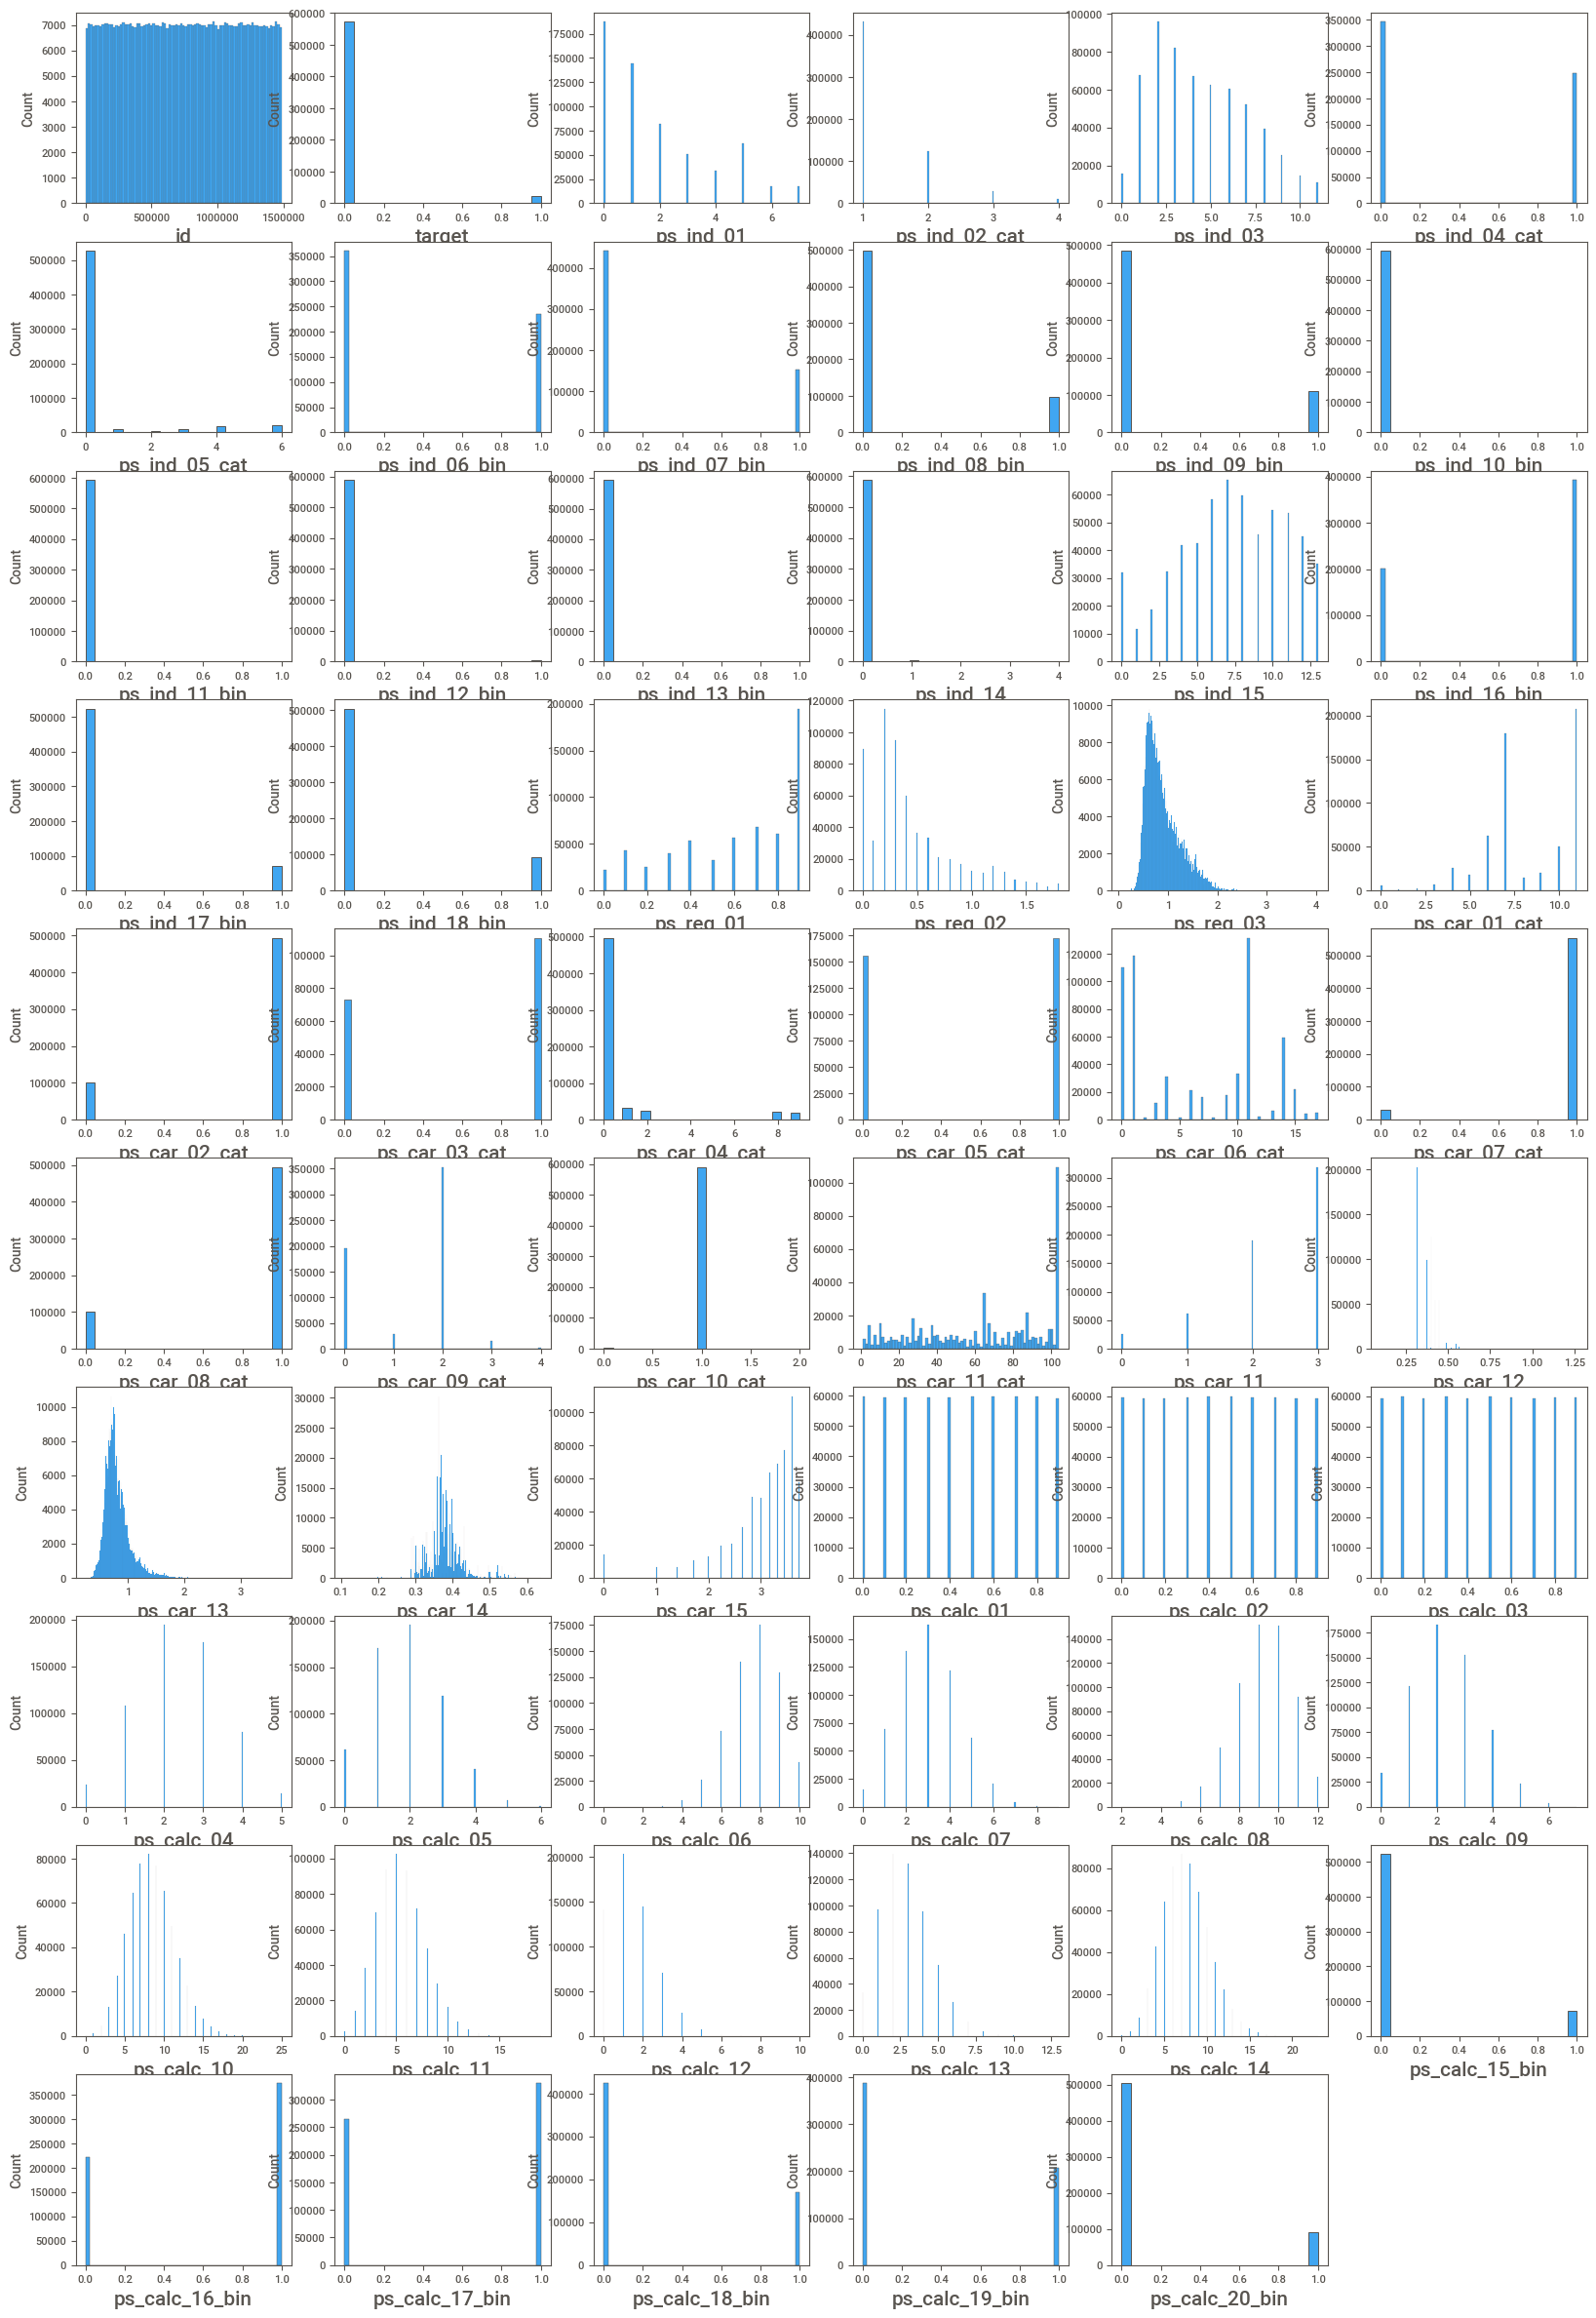

In [16]:
# Bivariate Analysis

plt.figure(figsize=(20, 30), facecolor='white')
plotnumber =1

for column in df.columns:
  if plotnumber<=60:
    ax = plt.subplot(10,6, plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column, fontsize = 15)
  plotnumber+=1
plt.show()

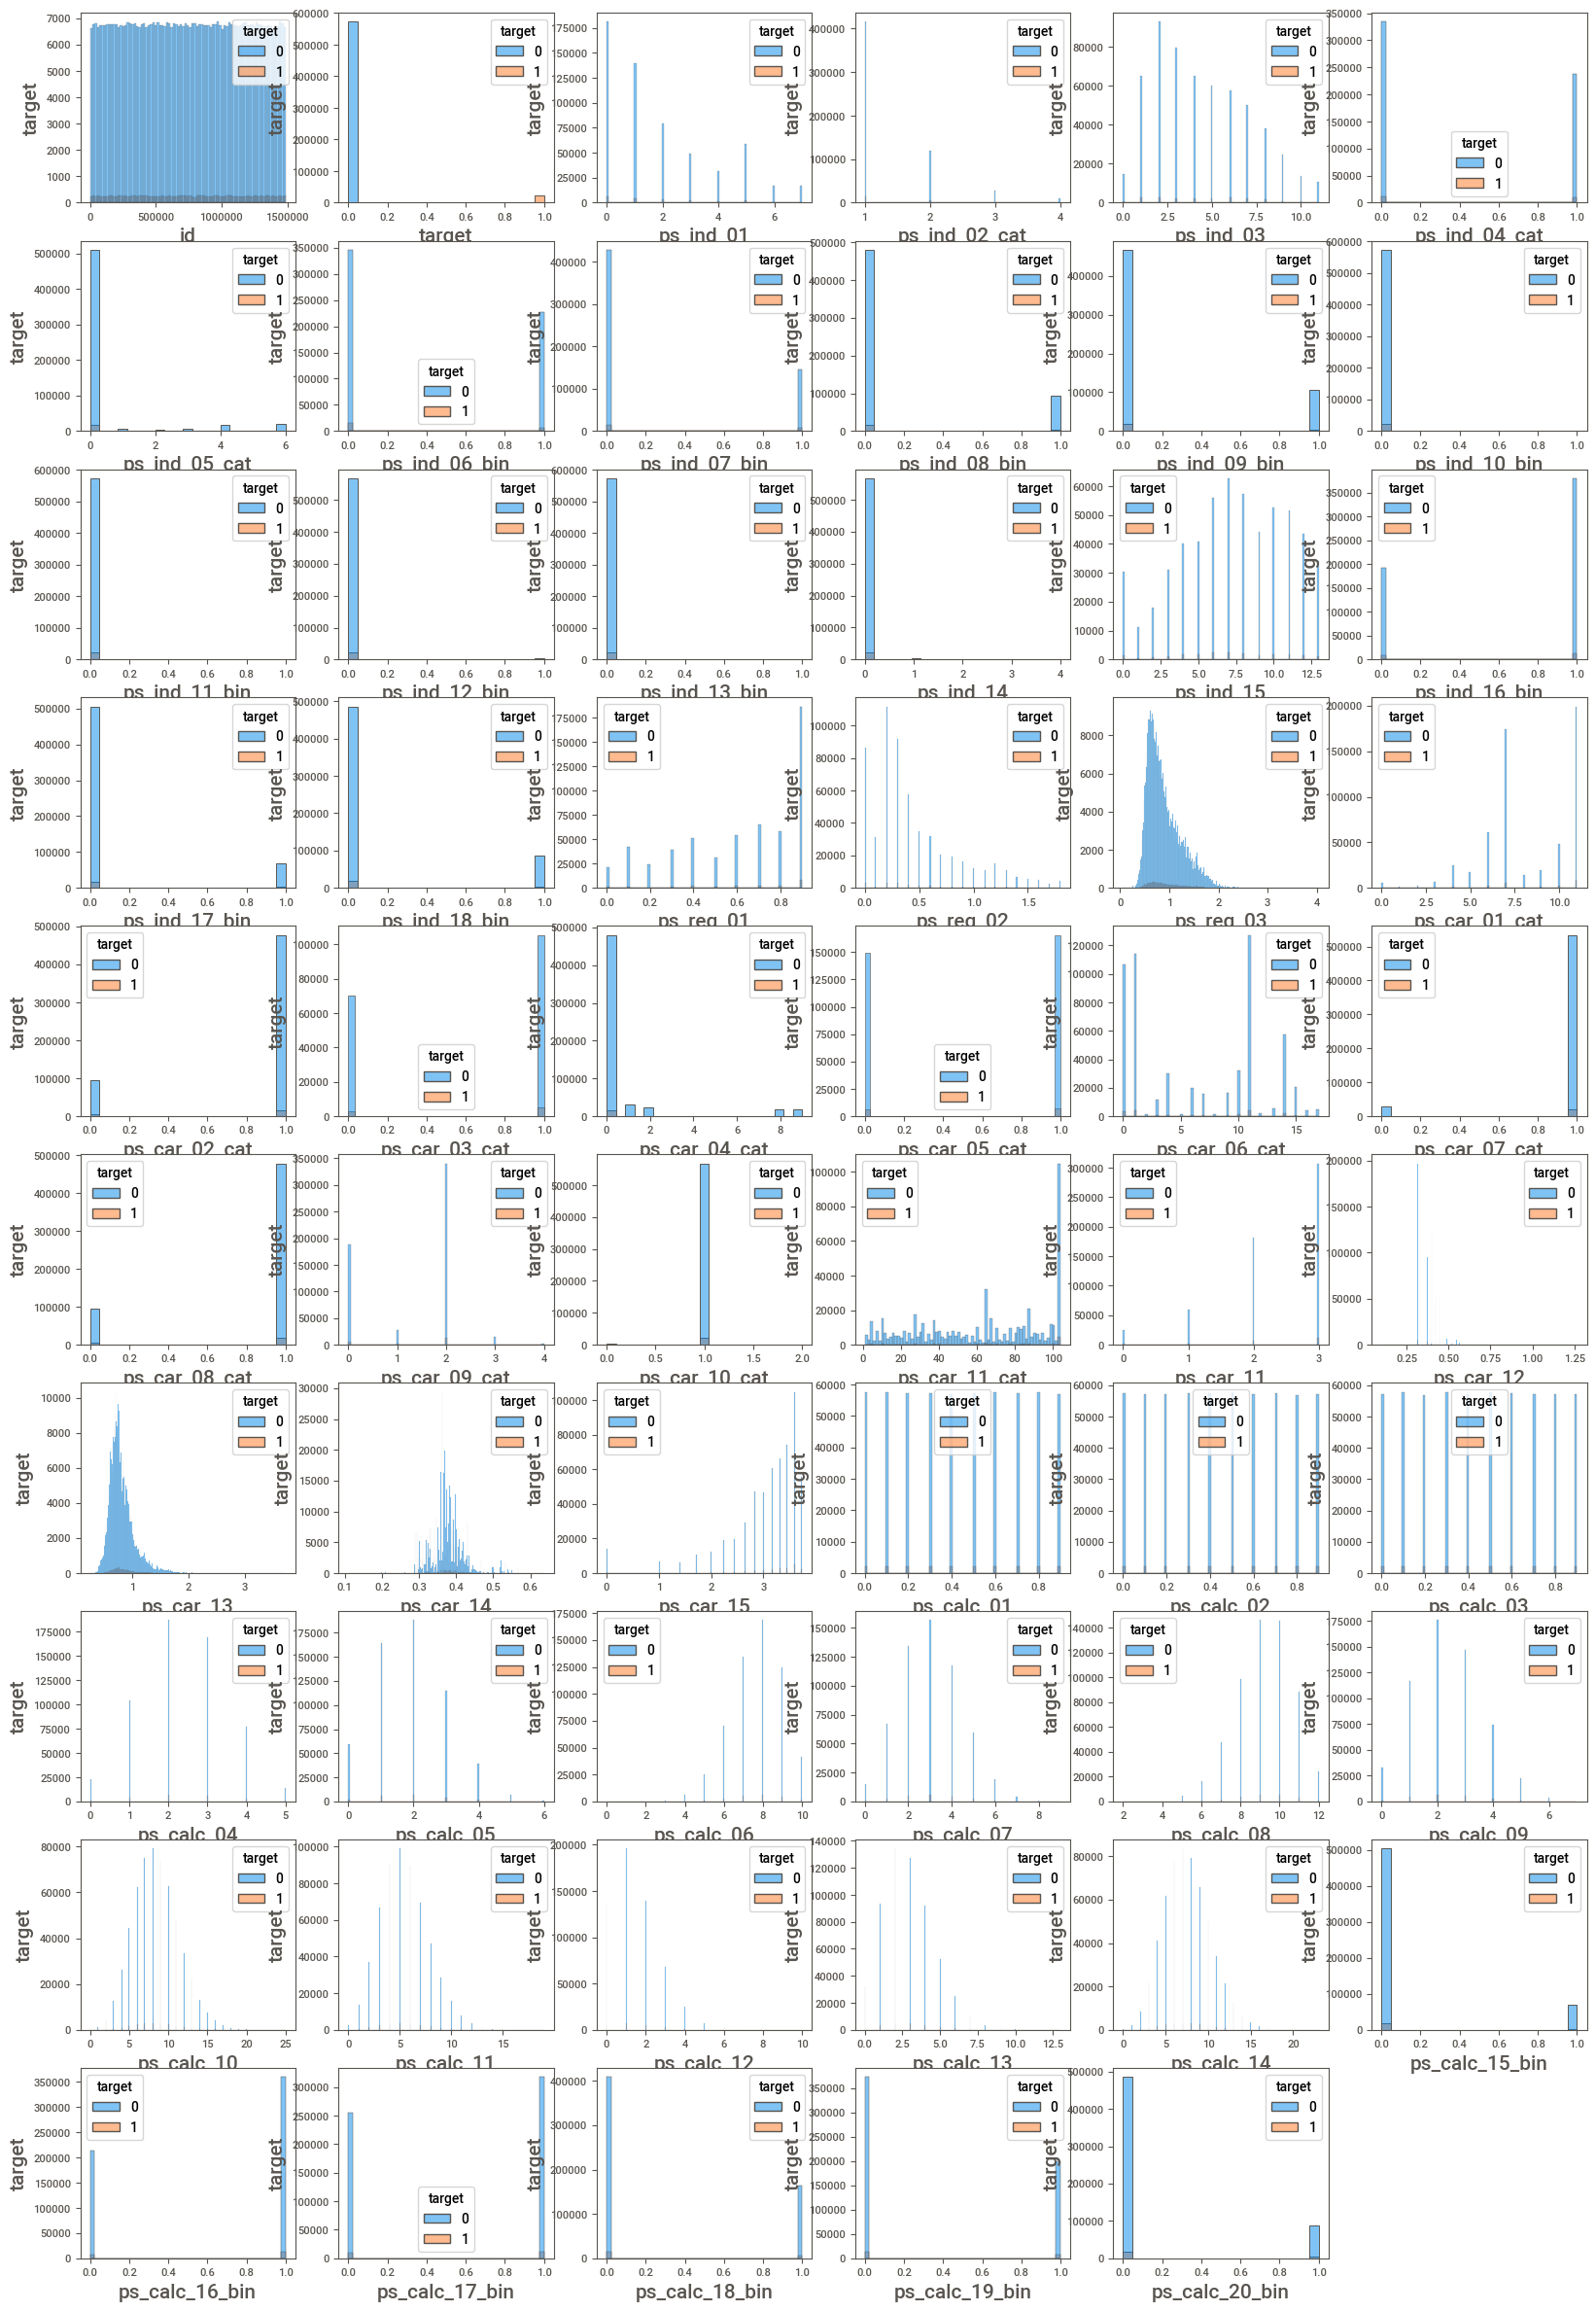

In [17]:
# Mutivariate Analysis

plt.figure(figsize=(20, 30), facecolor= 'white')
plotnumber =1

for column in df.columns:
  plotnumber<=60
  ax=plt.subplot(10,6,plotnumber)
  sns.histplot(x=df[column], hue =df['target'])
  plt.xlabel(column, fontsize=15)
  plt.ylabel('target', fontsize=15)
  plotnumber+=1
plt.show()

In [18]:
positive_class = df['target'].value_counts()[1]
negative_class = df['target'].value_counts()[0]
print("{0:0.2f}% of total points belongs to positive class."\
      .format((positive_class/(positive_class + negative_class)*100)))
print("{0:0.2f}% of total points belongs to negative class."\
      .format((negative_class/(positive_class + negative_class)*100)))

3.64% of total points belongs to positive class.
96.36% of total points belongs to negative class.


1. There is very high imbalance which is evident of the fact that only a small number of people actually file their claim.
2. Accuracy is not a good metric in this case.Recall and F1-Score is a better option



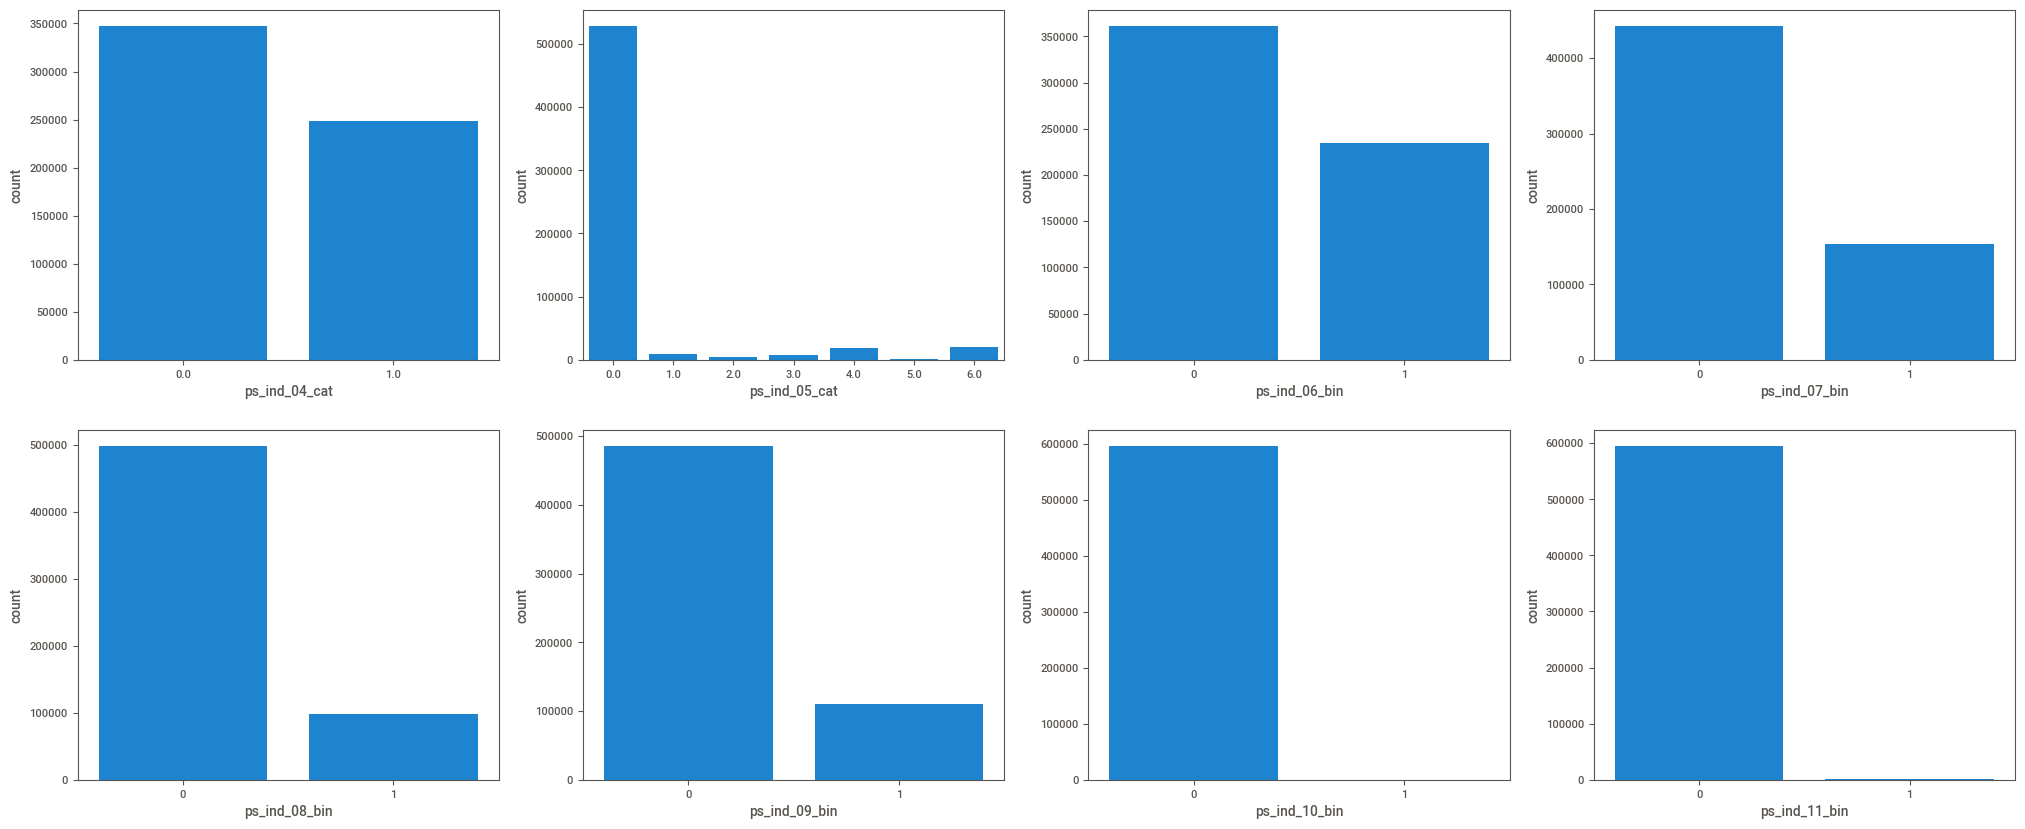

In [19]:
#Set - 1
ind_bin_feature_set_1 = df.columns[5:13]
fig, ax = plt.subplots(2, 4)
fig.set_size_inches((25,10))
cnt = 0
for i in range(2) :
  for j in range(4) :
    sns.countplot(x=ind_bin_feature_set_1[cnt], data = df, ax=ax[i,j])
    cnt+=1
plt.show()

1. Features in the 2nd row has very high imbalance and contains same value for almost all the data points. Such features are of little use.
2. Features in the 1st row have more balance than the second row and hence, they are more useful.

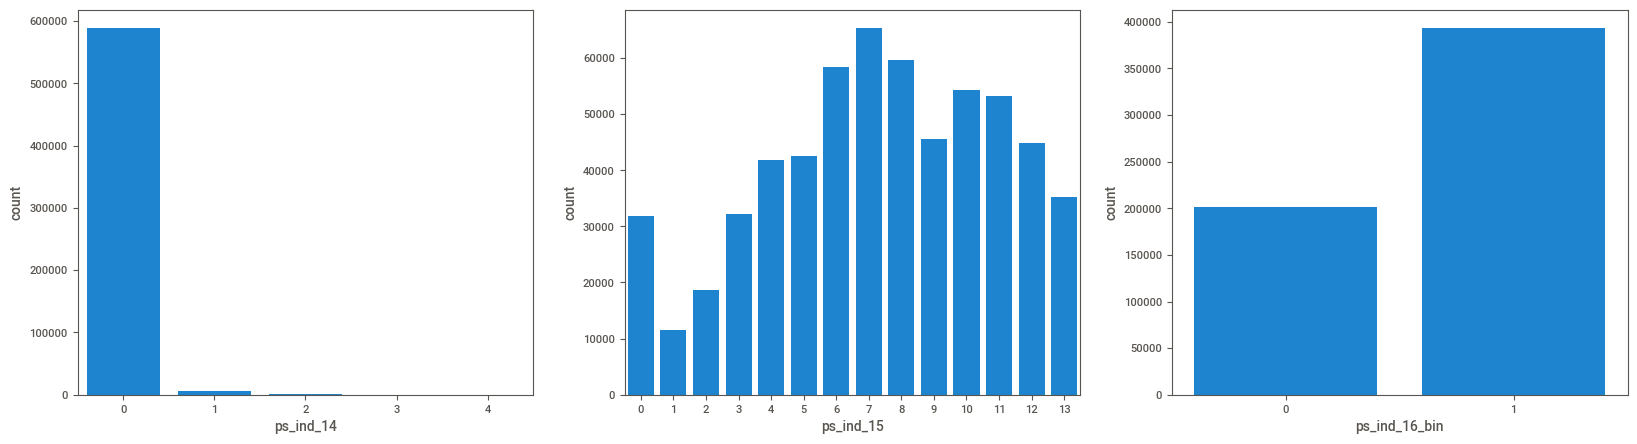

In [20]:
#Set - 2
ind_bin_feature_set_2 = df.columns[15:18]
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((20,5))
cnt = 0
for j in range(3) :
  sns.countplot(x=ind_bin_feature_set_2[cnt], data = df, ax=ax[j])
  cnt+=1
plt.show()

1. "ps_ind_16_bin" shows more balance than the other two.

In [23]:
def get_meta(train):
    data = []
    for col in df.columns:
        # Defining the role
        if col == 'target':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif df[col].dtype == np.float64:
            level = 'interval'
        elif df[col].dtype == np.int64:
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = df[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [25]:
meta_data = get_meta(df)
display(meta_data)

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,float64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,float64
ps_ind_05_cat,input,nominal,True,float64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [26]:
meta_counts = meta_data\
                    .groupby(['role', 'level'])\
                        .agg({'dtype': lambda x: x.count()})\
                            .reset_index()
display(meta_counts)

,role,level,dtype
0,id,nominal,1
1,input,binary,17
2,input,interval,11
3,input,nominal,14
4,input,ordinal,15
5,target,binary,1


[Text(0.5, 0, 'Variable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables Count Across Datatype')]

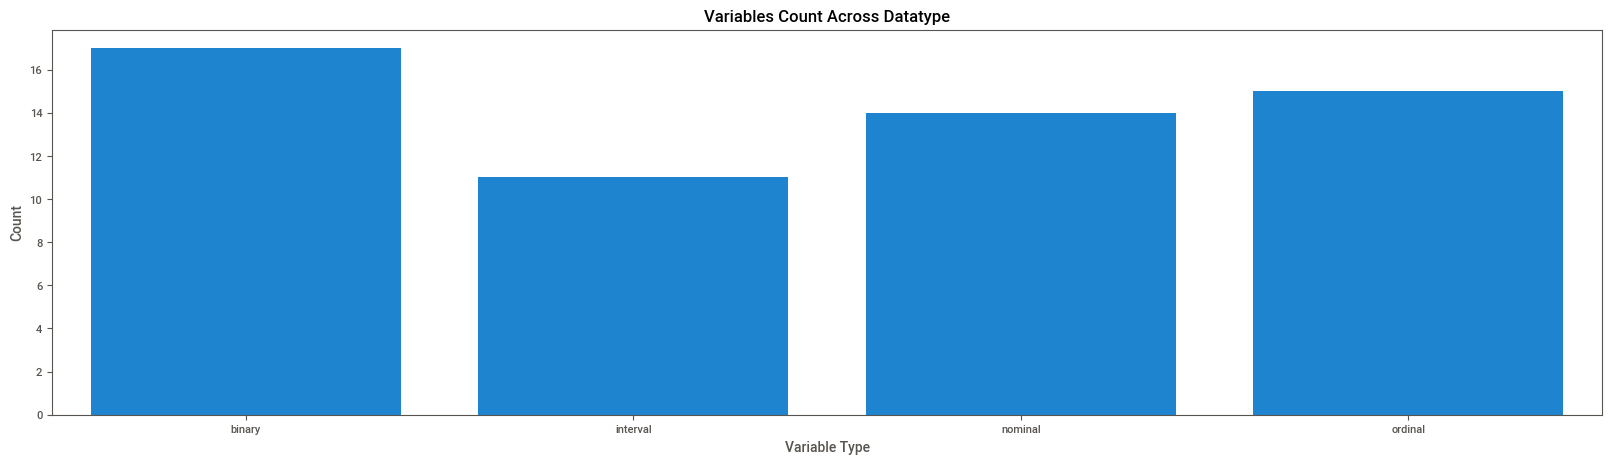

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=meta_counts[(meta_counts.role != 'target') & (meta_counts.role != 'id') ],
            x="level",
            y="dtype",
            ax=ax)

ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

In [28]:
col_ordinal   = meta_data[(meta_data.level == 'ordinal') & (meta_data.keep)].index
col_nominal   = meta_data[(meta_data.level == 'nominal') & (meta_data.keep)].index
col_internval = meta_data[(meta_data.level == 'interval') & (meta_data.keep)].index
col_binary    = meta_data[(meta_data.level == 'binary') & (meta_data.keep) & (meta_data.role != 'target')].index

### Correlation Pearson
if two variables = 1 so it's colinear, in this case the variables are the same thing and possibly only have different names


In [29]:
display(col_internval)

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12',
       'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02',
       'ps_calc_03'],
      dtype='object', name='varname')

In [30]:
corr_matrix = df[col_internval].corr()
display(corr_matrix)

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.000000,0.471027,0.189040,0.077135,0.018782,0.027097,-0.002083,0.002765,-0.000891,0.002194,-0.001538
ps_reg_02,0.471027,1.000000,0.742668,0.068140,0.171453,0.194316,0.055495,0.054510,0.001347,-0.000770,0.000022
ps_reg_03,0.189040,0.742668,1.000000,0.052932,0.228926,0.264800,0.090909,0.091401,0.000837,-0.000515,0.001832
ps_car_11,0.077135,0.068140,0.052932,1.000000,0.057021,0.101886,-0.039729,0.109680,0.000117,0.001712,-0.001633
ps_car_12,0.018782,0.171453,0.228926,0.057021,1.000000,0.672014,0.603361,0.049740,-0.000721,-0.000392,0.000151
ps_car_13,0.027097,0.194316,0.264800,0.101886,0.672014,1.000000,0.459047,0.529519,0.000157,0.000040,-0.000200
ps_car_14,-0.002083,0.055495,0.090909,-0.039729,0.603361,0.459047,1.000000,0.009733,-0.003274,-0.001883,-0.001110
ps_car_15,0.002765,0.054510,0.091401,0.109680,0.049740,0.529519,0.009733,1.000000,0.000344,-0.000252,-0.001043
ps_calc_01,-0.000891,0.001347,0.000837,0.000117,-0.000721,0.000157,-0.003274,0.000344,1.000000,-0.002418,0.000526
ps_calc_02,0.002194,-0.000770,-0.000515,0.001712,-0.000392,0.000040,-0.001883,-0.000252,-0.002418,1.000000,0.002948


<Axes: title={'center': 'Pearson correlation of continuous features'}>

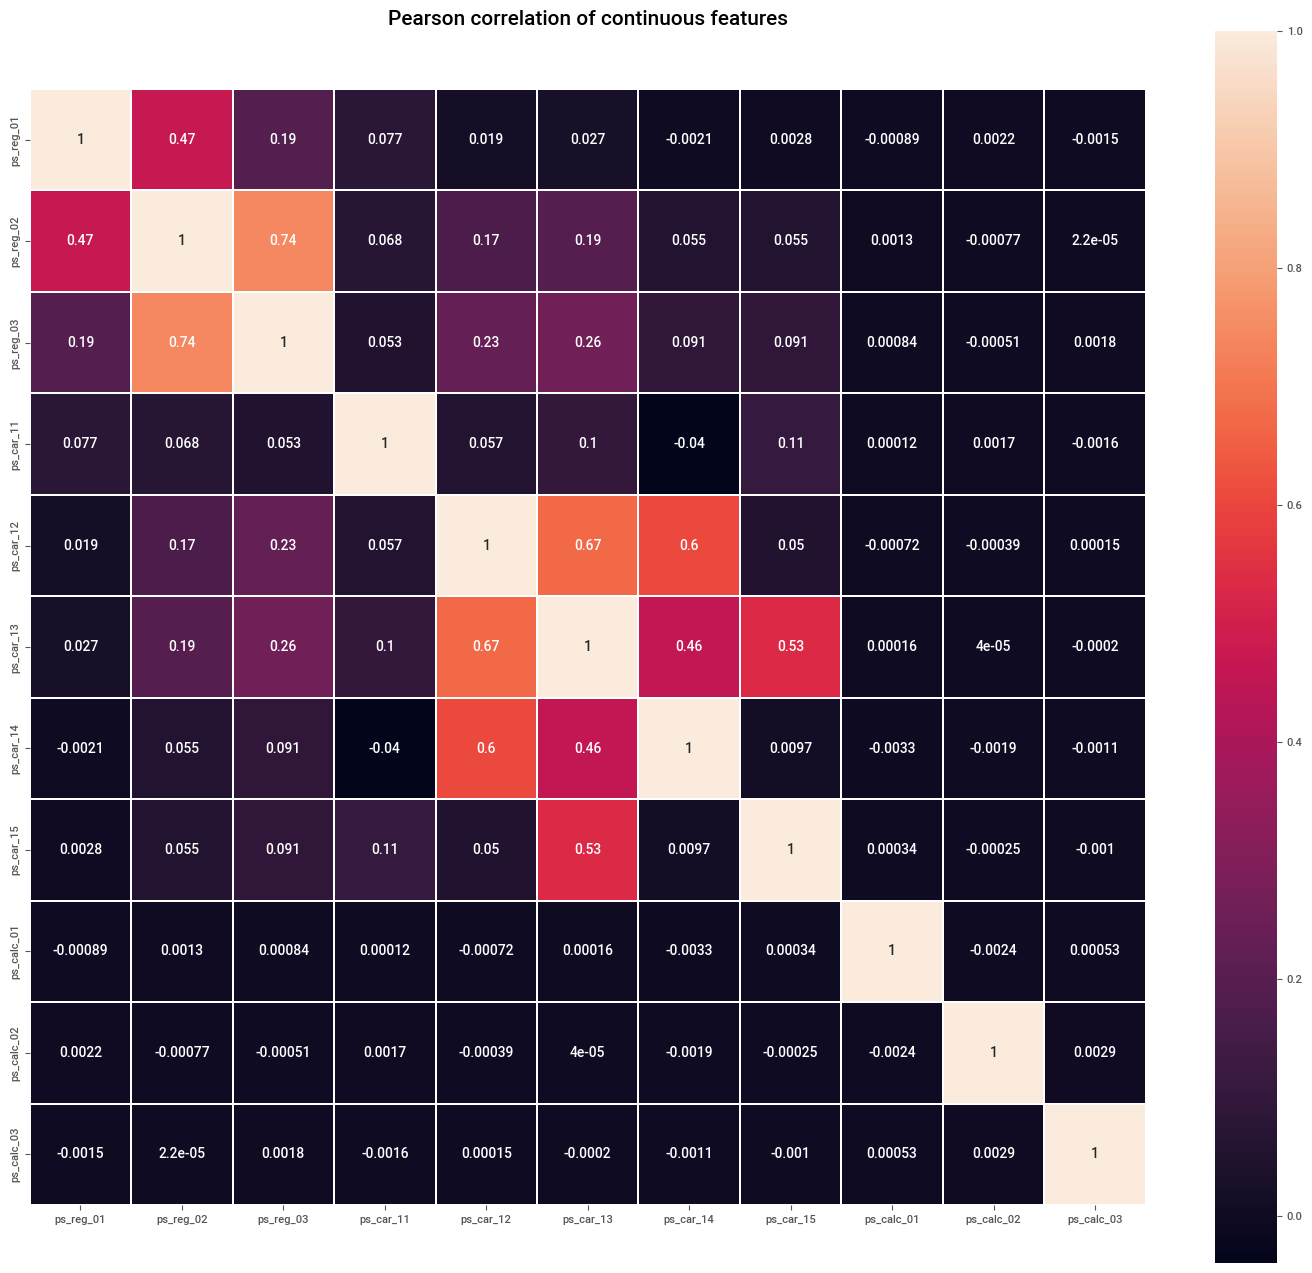

In [31]:
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df[col_internval].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            linecolor='white', 
            annot=True)

# Missing Values

In [32]:
# return TRUE if column contains one or more values missing
df.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12          True
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [33]:
missing_value_columns = df.columns[df.isnull().any()].tolist()
df_null = df[missing_value_columns]

In [34]:
print(missing_value_columns)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14']


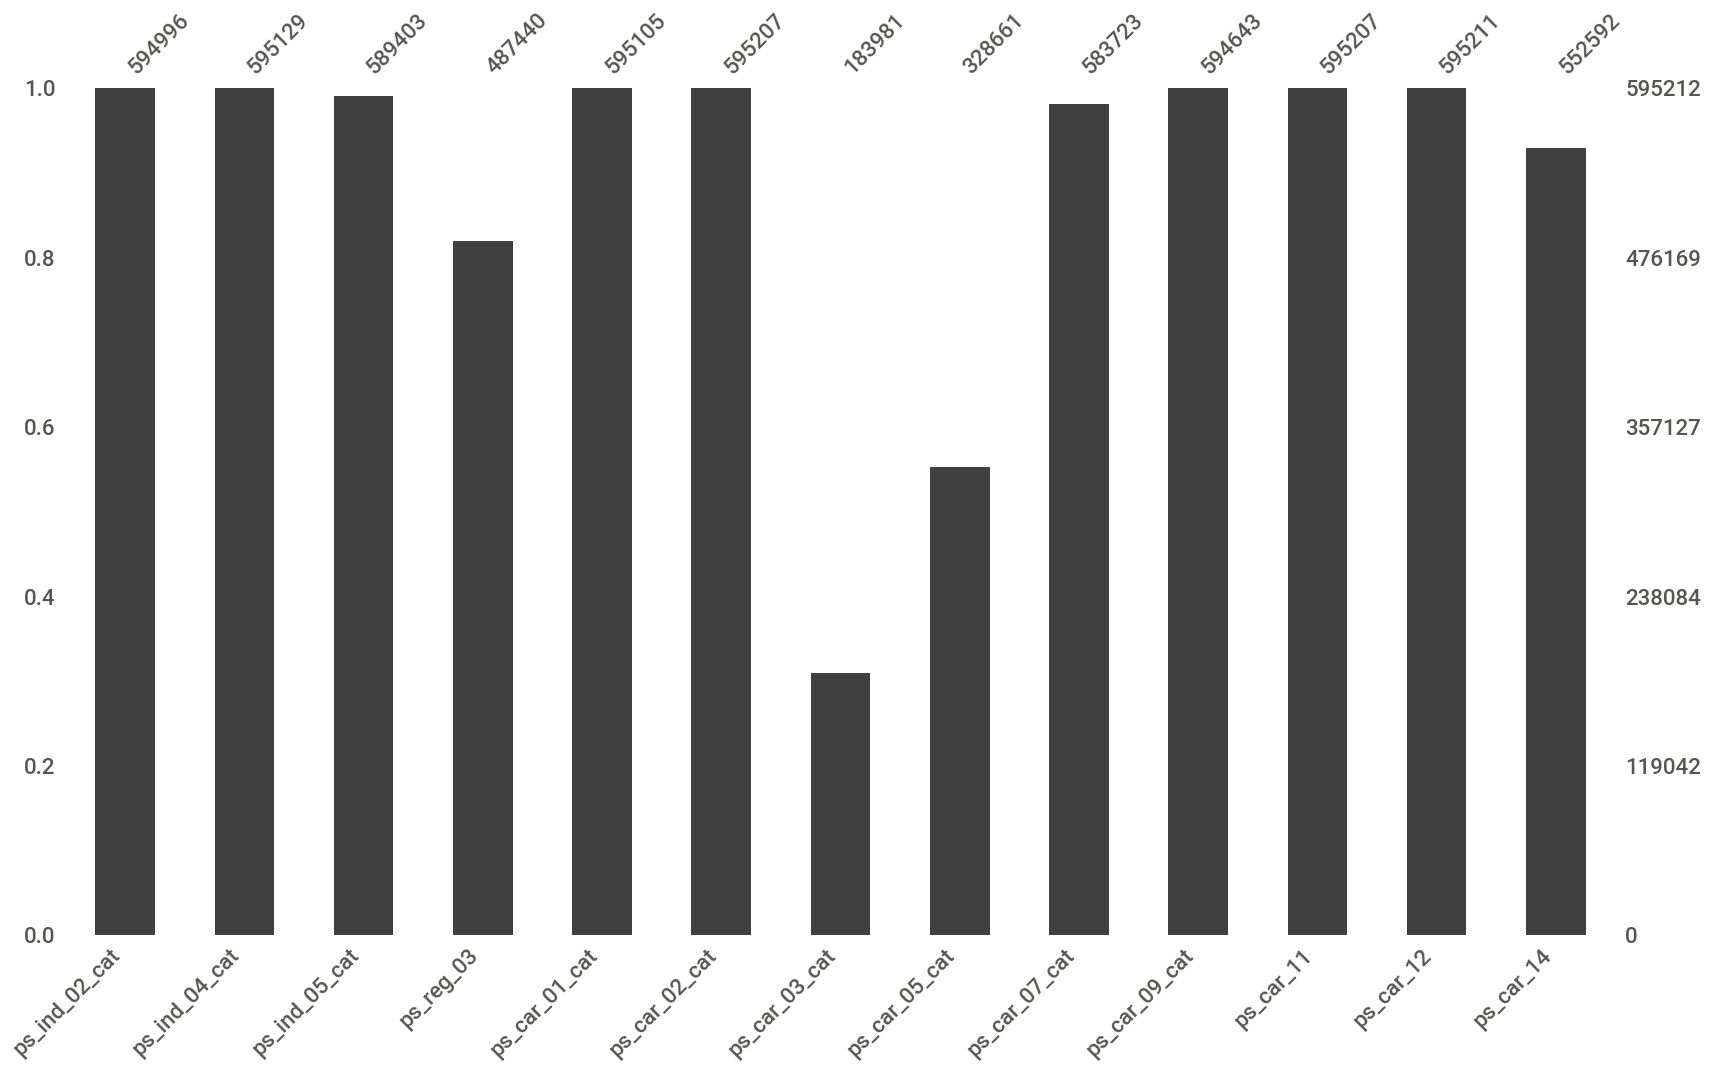

In [35]:
# show a quantidade de missing por columns
msno.bar(df_null, 
         figsize=(20,11),
         labels=True,
         color=(0.25, 0.25, 0.25));

## Correlations Between Missing Values
Very important analysis missing values.
Simple solution: values_missing = -1

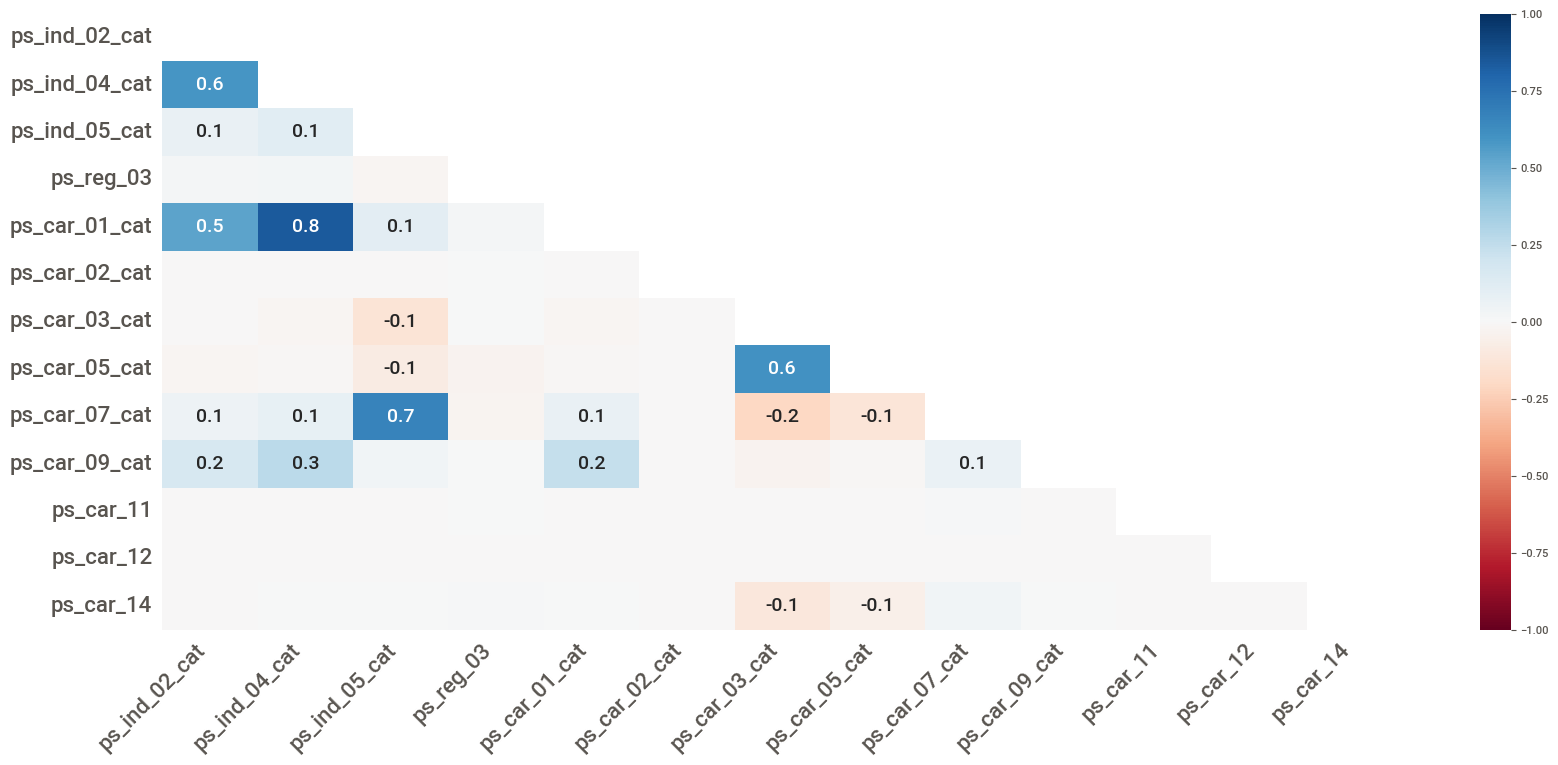

In [36]:
msno.heatmap(df_null,figsize=(20,8));

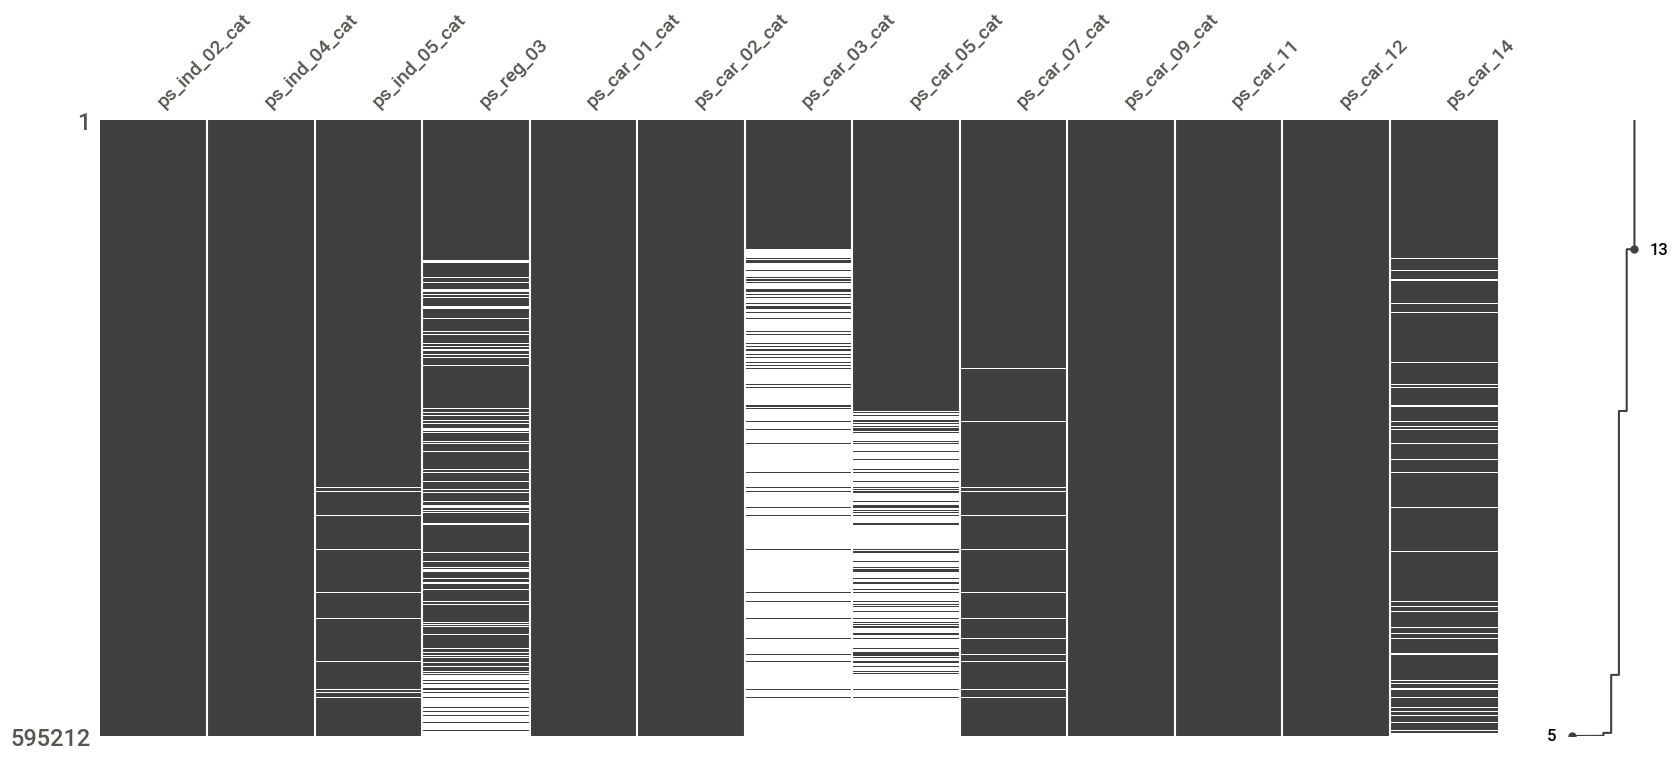

In [37]:
sorted_data = msno.nullity_sort(df_null, sort='descending')
msno.matrix(sorted_data, figsize=(20,8), fontsize=14, color=(0.25, 0.25, 0.25));

# Feature Importance

In [38]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=25):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame"""
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sroted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    return pd.DataFrame(data={'feature': top_features, 'importance': top_importances})

In [39]:
rf = RandomForestClassifier(n_estimators=150, # numbers tree
                            max_depth=8,
                            min_samples_leaf=4,
                            max_features=0.2, # each tree utility 20% in the features
                            n_jobs=-1,
                            random_state=42)

In [40]:
# trainning model
rf.fit(df.drop(['target'], axis=1), df.target)
features = df.drop(['target'], axis=1).columns.values
print("---Traing Done---")

---Traing Done---


In [41]:
# get trained model (rf) and avalible the feature_importance
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

# print 25 feature_importance in the rf randomForest
feature_importance

,feature,importance
0,id,NaN
1,ps_ind_01,NaN
2,ps_ind_02_cat,NaN
3,ps_ind_03,NaN
4,ps_ind_04_cat,NaN
5,ps_ind_05_cat,NaN
6,ps_ind_06_bin,NaN
7,ps_ind_07_bin,NaN
8,ps_ind_08_bin,NaN
9,ps_ind_09_bin,NaN


In [42]:
def get_without_importance(df_feature_importance: pd.core.frame.DataFrame) -> list:
    list_drop_col = []
              
    cond_duracao = (df_feature_importance['importance'] < 0.01)
    df_temp = df_feature_importance[cond_duracao]
    
    list_drop_col = df_temp['feature'].tolist()
    
    print("-"*25, "FEATURE WITHOUT IMPORTANCE", "-"*25, end='\n\n')
    print(df_temp)
    return list_drop_col

In [43]:
def remove_without_importace(df: pd.core.frame.DataFrame, list_without_imp: list) -> int:
    print(f'Columns before = {data.shape[1]}')
    
    for column in list_without_imp:
        del data[column]
        
    return print(f"Columns after = {data.shape[1]}")

In [44]:
list_without_importance = get_without_importance(df_feature_importance = feature_importance)

------------------------- FEATURE WITHOUT IMPORTANCE -------------------------

Empty DataFrame
Columns: [feature, importance]
Index: []


# Evaluation


In [45]:
def cross_val_model(X,y, model, n_splits=3):
    'Do split dataset and calculate cross_score'
    X = np.array(X)
    y = np.array(y)
    folds = list(StratifiedKFold(n_splits=n_splits,
                                 shuffle=True,
                                 random_state=2017).split(X, y))

    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        y_holdout = y[test_idx]

        print ("Fit %s fold %d" % (str(model).split('(')[0], j+1))
        model.fit(X_train, y_train)
        cross_score = cross_val_score(model, X_holdout, y_holdout, cv=3, scoring='roc_auc')
        print("    cross_score: %.5f" % cross_score.mean())

# Modeling

### Baseline Models
Start base_line be very simple:

missing_values = -1
E.g: logistic_regression, random_forest, metures


### Random Forest Model

Each tree have your dataset and features

In [46]:
#RandomForest params
rf_params = {}
rf_params['n_estimators'] = 200
rf_params['max_depth'] = 6
rf_params['n_jobs'] = -1 # run all process

In [47]:
# create model
rf_model = RandomForestClassifier(**rf_params)

# training model
X = df.drop('target',axis=1)
y = df['target']

In [48]:
# split dataset and calculate cross_score
cross_val_model(X, y, rf_model)

Fit RandomForestClassifier fold 1
    cross_score: 0.53814
Fit RandomForestClassifier fold 2
    cross_score: 0.55680
Fit RandomForestClassifier fold 3
    cross_score: 0.58391


### XGBoost Modelable

- Model very robust
- descentent gradient
- regularization parameter: help avoid overfitting
- parallelizable

In [49]:
# XGBoost params
xgb_params = {}
xgb_params['learning_rate'] = 0.02
xgb_params['n_estimators'] = 100
xgb_params['max_depth'] = 6
xgb_params['subsample'] = 0.9
xgb_params['colsample_bytree'] = 0.9
xgb_params['boosting'] = 'gbdt'
xgb_params['metric'] = 'multiclass'
xgb_params['eval_metric'] = 'mlogloss'

In [50]:
# create model
XGB_model = XGBClassifier(**rf_params)

# training model
X = df.drop('target',axis=1)
y = df['target']

In [51]:
cross_val_model(X, y, XGB_model)

Fit XGBClassifier fold 1
    cross_score: 0.55798
Fit XGBClassifier fold 2
    cross_score: 0.55113
Fit XGBClassifier fold 3
    cross_score: 0.56011


## Model Comparison Report

In this Insurance Claim Predicition Project, we used Random Forest Classifier and XG Boost Algorithms to predict the model. Based on the evalution and modeling, we can see that the Random Forst Classifier improves the score compare other. Besides, we know Random Forest Classifier improves accuracy through cross-validation. Also, the data contains missing values, so using random forest classifier improves the accuracy of the data.